### **Galaxy Cluster Member Colors**

In [1]:
import GCRCatalogs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
%matplotlib inline

In [54]:
gc = GCRCatalogs.load_catalog('protoDC2_test')
data = gc.get_quantities(['halo_mass', 'redshift',
                        'mag_u', 'mag_g', 'mag_r', 
                        'mag_i', 'mag_z'], filters=['halo_mass > 3e13'])


/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/GCRCatalogs/alphaq.py:114: UserWarning: No md5 sum specified in the config file
  warnings.warn('No md5 sum specified in the config file')


#### First, we get the galaxy magnitudes, redshift and host halo mass from ProtoDC2. We get cluster member galaxies by filtering host mass to be above 3e13 Msun. 
#### To speed up the run time of the notebook, we are using the test version of the catalog. **The underlaying catalog file is the same between the test and normal versions.** When you use the normal version, an md5sum check sum is preformed on the catalog file, which takes a while for ~20GiB. The test version skips this check and returns the data much faster. The warning is just a reminder that the check is skipped

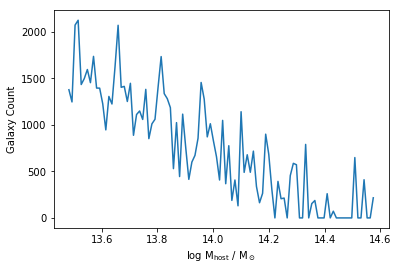

In [57]:
plt.figure()
h,xbins = np.histogram(np.log10(data['halo_mass']),bins=100)
xbins_avg = (xbins[1:]+xbins[:-1])/2.0
plt.plot(xbins_avg, h)
plt.ylabel(r'Galaxy Count')
plt.xlabel(r'log M$_{\rm{host}}$ / M$_\odot$')
plt.show()

#### As a sanity check, we made sure no galaxy has a host halo below 1e13 Msun.

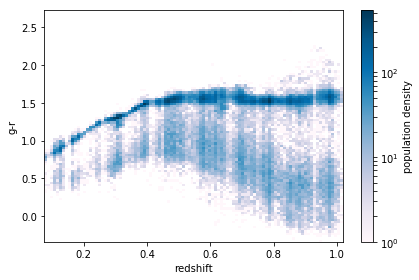

In [65]:
plt.figure()
gal_clr = data['mag_g']-data['mag_r']
plt.hist2d(data['redshift'], gal_clr, bins=100, cmap='PuBu', norm=clr.LogNorm())
plt.colorbar(label='population density')
plt.ylabel('g-r')
plt.xlabel('redshift')
plt.tight_layout()
plt.show()

#### Observed g-r cluster member color as a function of redshift

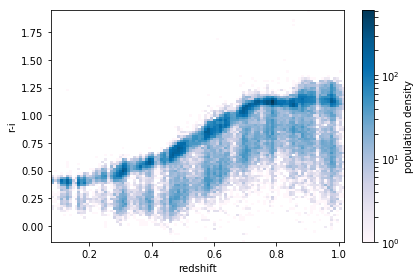

In [66]:
plt.figure()
gal_clr = data['mag_r']-data['mag_i']
plt.hist2d(data['redshift'], gal_clr, bins=100, cmap='PuBu',norm=clr.LogNorm())
plt.colorbar(label='population density')
plt.ylabel('r-i')
plt.xlabel('redshift')
plt.tight_layout()
plt.show()

#### Observed r-i cluster member color as a function of redshift